In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
data = keras.datasets.fashion_mnist

import os
import PIL
import PIL.Image

#import tensorflow.datasets as tfds

print(tf.__version__)

import pathlib

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_url = "http://127.0.0.1/train.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)


2.3.0
2129920/2129920 [==============================] - 0s 0us/step
200


In [34]:
print(data_dir)

/home/tom/.keras/datasets/flower


In [80]:
batch_size = 32
img_height = 28
img_width = 28
# train_ds and val_ds are what we prepare for CNN model
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

pre_ds= tf.keras.preprocessing.image_dataset_from_directory(
  "/home/tom/.keras/datasets/predict",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 290 files belonging to 2 classes.
Using 232 files for training.
Found 290 files belonging to 2 classes.
Using 58 files for validation.
Found 20 files belonging to 2 classes.
Using 16 files for training.


In [24]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

0.0 1.0


In [81]:
normalized_ds = pre_ds.map(lambda x, y: (normalization_layer(x), y))
pre_raw_images, pre_raw_labels = next(iter(pre_ds))
pre_images, pre_labels = next(iter(normalized_ds))

16
cloth


16
ankleboot
cloth


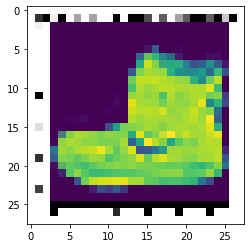

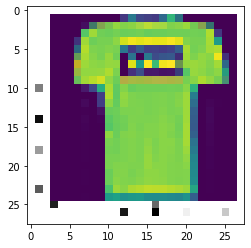

In [86]:
print(len(pre_raw_images))
print(class_names[pre_raw_labels[1]])
print(class_names[pre_labels[1]])

plt.imshow(pre_raw_images[1].numpy().astype("uint8"))
plt.show()

plt.imshow(pre_images[1])
plt.show()

In [42]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=pre_ds,
  epochs=5
)


test_loss, test_acc = model.evaluate(pre_ds)

Epoch 1/5
8/8 [==============================] - 0s 24ms/step - loss: 3.2783e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 0s 13ms/step - loss: 5.1383e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 729us/step - loss: 0.0000e+00 - accuracy: 1.0000


In [43]:
print("Tested Acc:", test_acc)

Tested Acc: 1.0


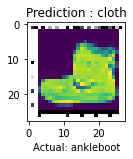

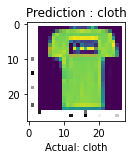

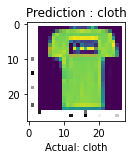

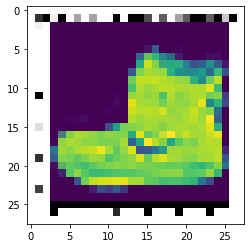

In [91]:
prediction = model.predict(pre_images)
plt.figure(figsize=(6, 6))

for i in range(3):
    #plt.grid(False)
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(pre_images[i])
    
    #plt.imshow(pre_image[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[pre_labels[i]])
    plt.title("Prediction : " + class_names[np.argmax(prediction[i])])
    plt.show()
    plt.imshow(pre_raw_images[i].numpy().astype("uint8"))
    #plt.show()

['ankleboot', 'cloth']


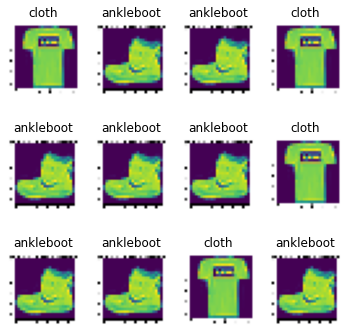

In [97]:
class_names = val_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")